In [2]:
import rasterio

esaworldcover = "data/esa-worldcover/ESA_WorldCover_10m_2020_v100_S33E120_Map.tif"
with rasterio.open(esaworldcover) as src:
    data_array = src.read(1)
    crs = src.crs
    transform = src.transform
    colormap_def = src.colormap(1)
    bounds = src.bounds

<Axes: >

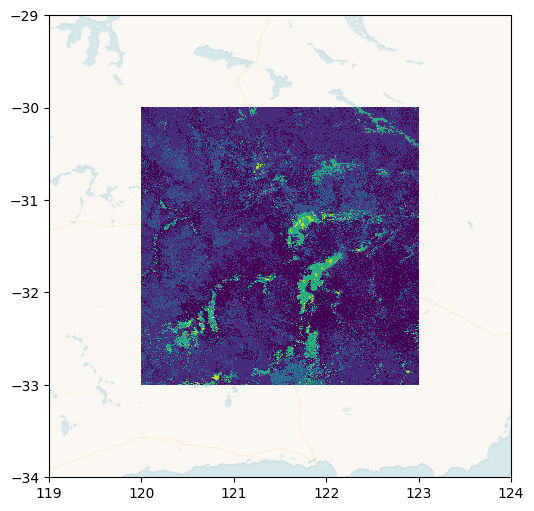

In [18]:
import contextily as cx
import matplotlib.pyplot as plt
import rasterio.plot

offset = 1
xlim = [bounds[0] - offset, bounds[2] + offset]
ylim = [bounds[1] - offset, bounds[3] + offset]

fig, ax = plt.subplots(figsize=(6, 6))
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
cx.add_basemap(ax=ax, crs=crs, source=cx.providers.CartoDB.Voyager, attribution=False)

rasterio.plot.show(
    data_array,
    transform=transform,
    ax=ax,
    interpolation="nearest",
)